# Big Reports (AKKA) vs Old Reports Performance Test Comparison

## Read Data

In [105]:
import pandas as pd
import numpy as np
import pylab as P
import matplotlib as mp
import matplotlib.pyplot as plt

%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 10)
pylab.rcParams['figure.figsize'] = (60, 40)

#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_off_node_120_v1_test4h\\benchmarkResults.csv")

#akka perf test at bechmark - verification run
#data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_15_node_120_v1_test4h_validation\\benchmarkResults.csv")
data = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\stat_noakka_v1_test4h_newstorage\\benchmarkResults.csv")

#akka perf test at bechmark - verification run after report storage
data2 = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_15_node_v1_test4h_newstorage_run2\\WsReport_round1_Xml_minutePeak120.csv")


#akka perf test at bechmark
#data2 = pd.read_csv("\\\\CISOI-P-Bench1\\c$\\temp\\stat_akka_15_node_120_v1_test4h\\benchmarkResults.csv")

#latvia live perf test run
#data2 = pd.read_csv("C:\\Users\\m.hron\\AppData\\Local\\Packages\\Microsoft.SkypeApp_kzf8qxf38zg5c\\LocalState\\Downloads\\WsReport_round1_Xml_minutePeak120v2.csv")
data.head()

Populating the interactive namespace from numpy and matplotlib


C:\Users\m.hron\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,State,CreditInfoId,ContractCount,Duration,DurationSeconds,StartTime,EndTime,ErrorMessage,TestType,Round,Output,MinutePeak
0,Ok,99212586,1,00:00:06.5121096,6.512110,07/10/2017 09:28:44,07/10/2017 09:28:50,NaN,WsReport,1,Xml,120
1,Ok,72444680,2,00:00:06.4658869,6.465887,07/10/2017 09:28:44,07/10/2017 09:28:50,NaN,WsReport,1,Xml,120
2,Ok,5555891,4,00:00:06.5215118,6.521512,07/10/2017 09:28:44,07/10/2017 09:28:51,NaN,WsReport,1,Xml,120
3,Ok,7973933,3,00:00:06.2424113,6.242411,07/10/2017 09:28:45,07/10/2017 09:28:51,NaN,WsReport,1,Xml,120
4,Ok,980815,5,00:00:05.9664327,5.966433,07/10/2017 09:28:45,07/10/2017 09:28:51,NaN,WsReport,1,Xml,120


In [106]:
print("# of errors in the 1st set: ", len([x for x in data["State"] if x != 'Ok']))
print("# of errors in the 2nd set: ", len([x for x in data2["State"] if x != 'Ok']))

print("size of the 1st set ",len(data))
print("size of the 2nd set ",len(data2))

data2 = data2[data2.DurationSeconds < 20]

# of errors in the 1st set:  0
# of errors in the 2nd set:  0
size of the 1st set  28501
size of the 2nd set  23643


## Compare statistics between data sets

In [107]:
def writeDurations(data1, data2):
    d1 = data1["DurationSeconds"]
    d2 = data2["DurationSeconds"]

    print("mean: ", d1.mean(), " ", d2.mean())
    
    print("max: ", d1.max(), " ", d2.max())
    print("min: ", d1.min(), " ", d2.min())
    print("median: ", d1.median(), " ", d2.median())
    print("80: ", d1.quantile(.8), " ", d2.quantile(.8))
    print("94: ", d1.quantile(.94), " ", d2.quantile(.94))
    print("95: ", d1.quantile(.95), " ", d2.quantile(.95))
    print("98: ", d1.quantile(.98), " ", d2.quantile(.98))
    print("99: ", d1.quantile(.99), " ", d2.quantile(.99))

writeDurations(data, data2)
#writeDurations(data2)


mean:  0.4985621827199047   0.4839740740219079
max:  6.6522041   4.5198382
min:  0.1004408   0.1006395
median:  0.44123140000000005   0.4551443
80:  0.5597691   0.5730593800000001
94:  0.8796225000000001   0.744391612
95:  0.9572321   0.7810855699999997
98:  1.4245617   1.046207108
99:  1.8046921999999999   1.3172231819999984


## Draw report time distribution to graph

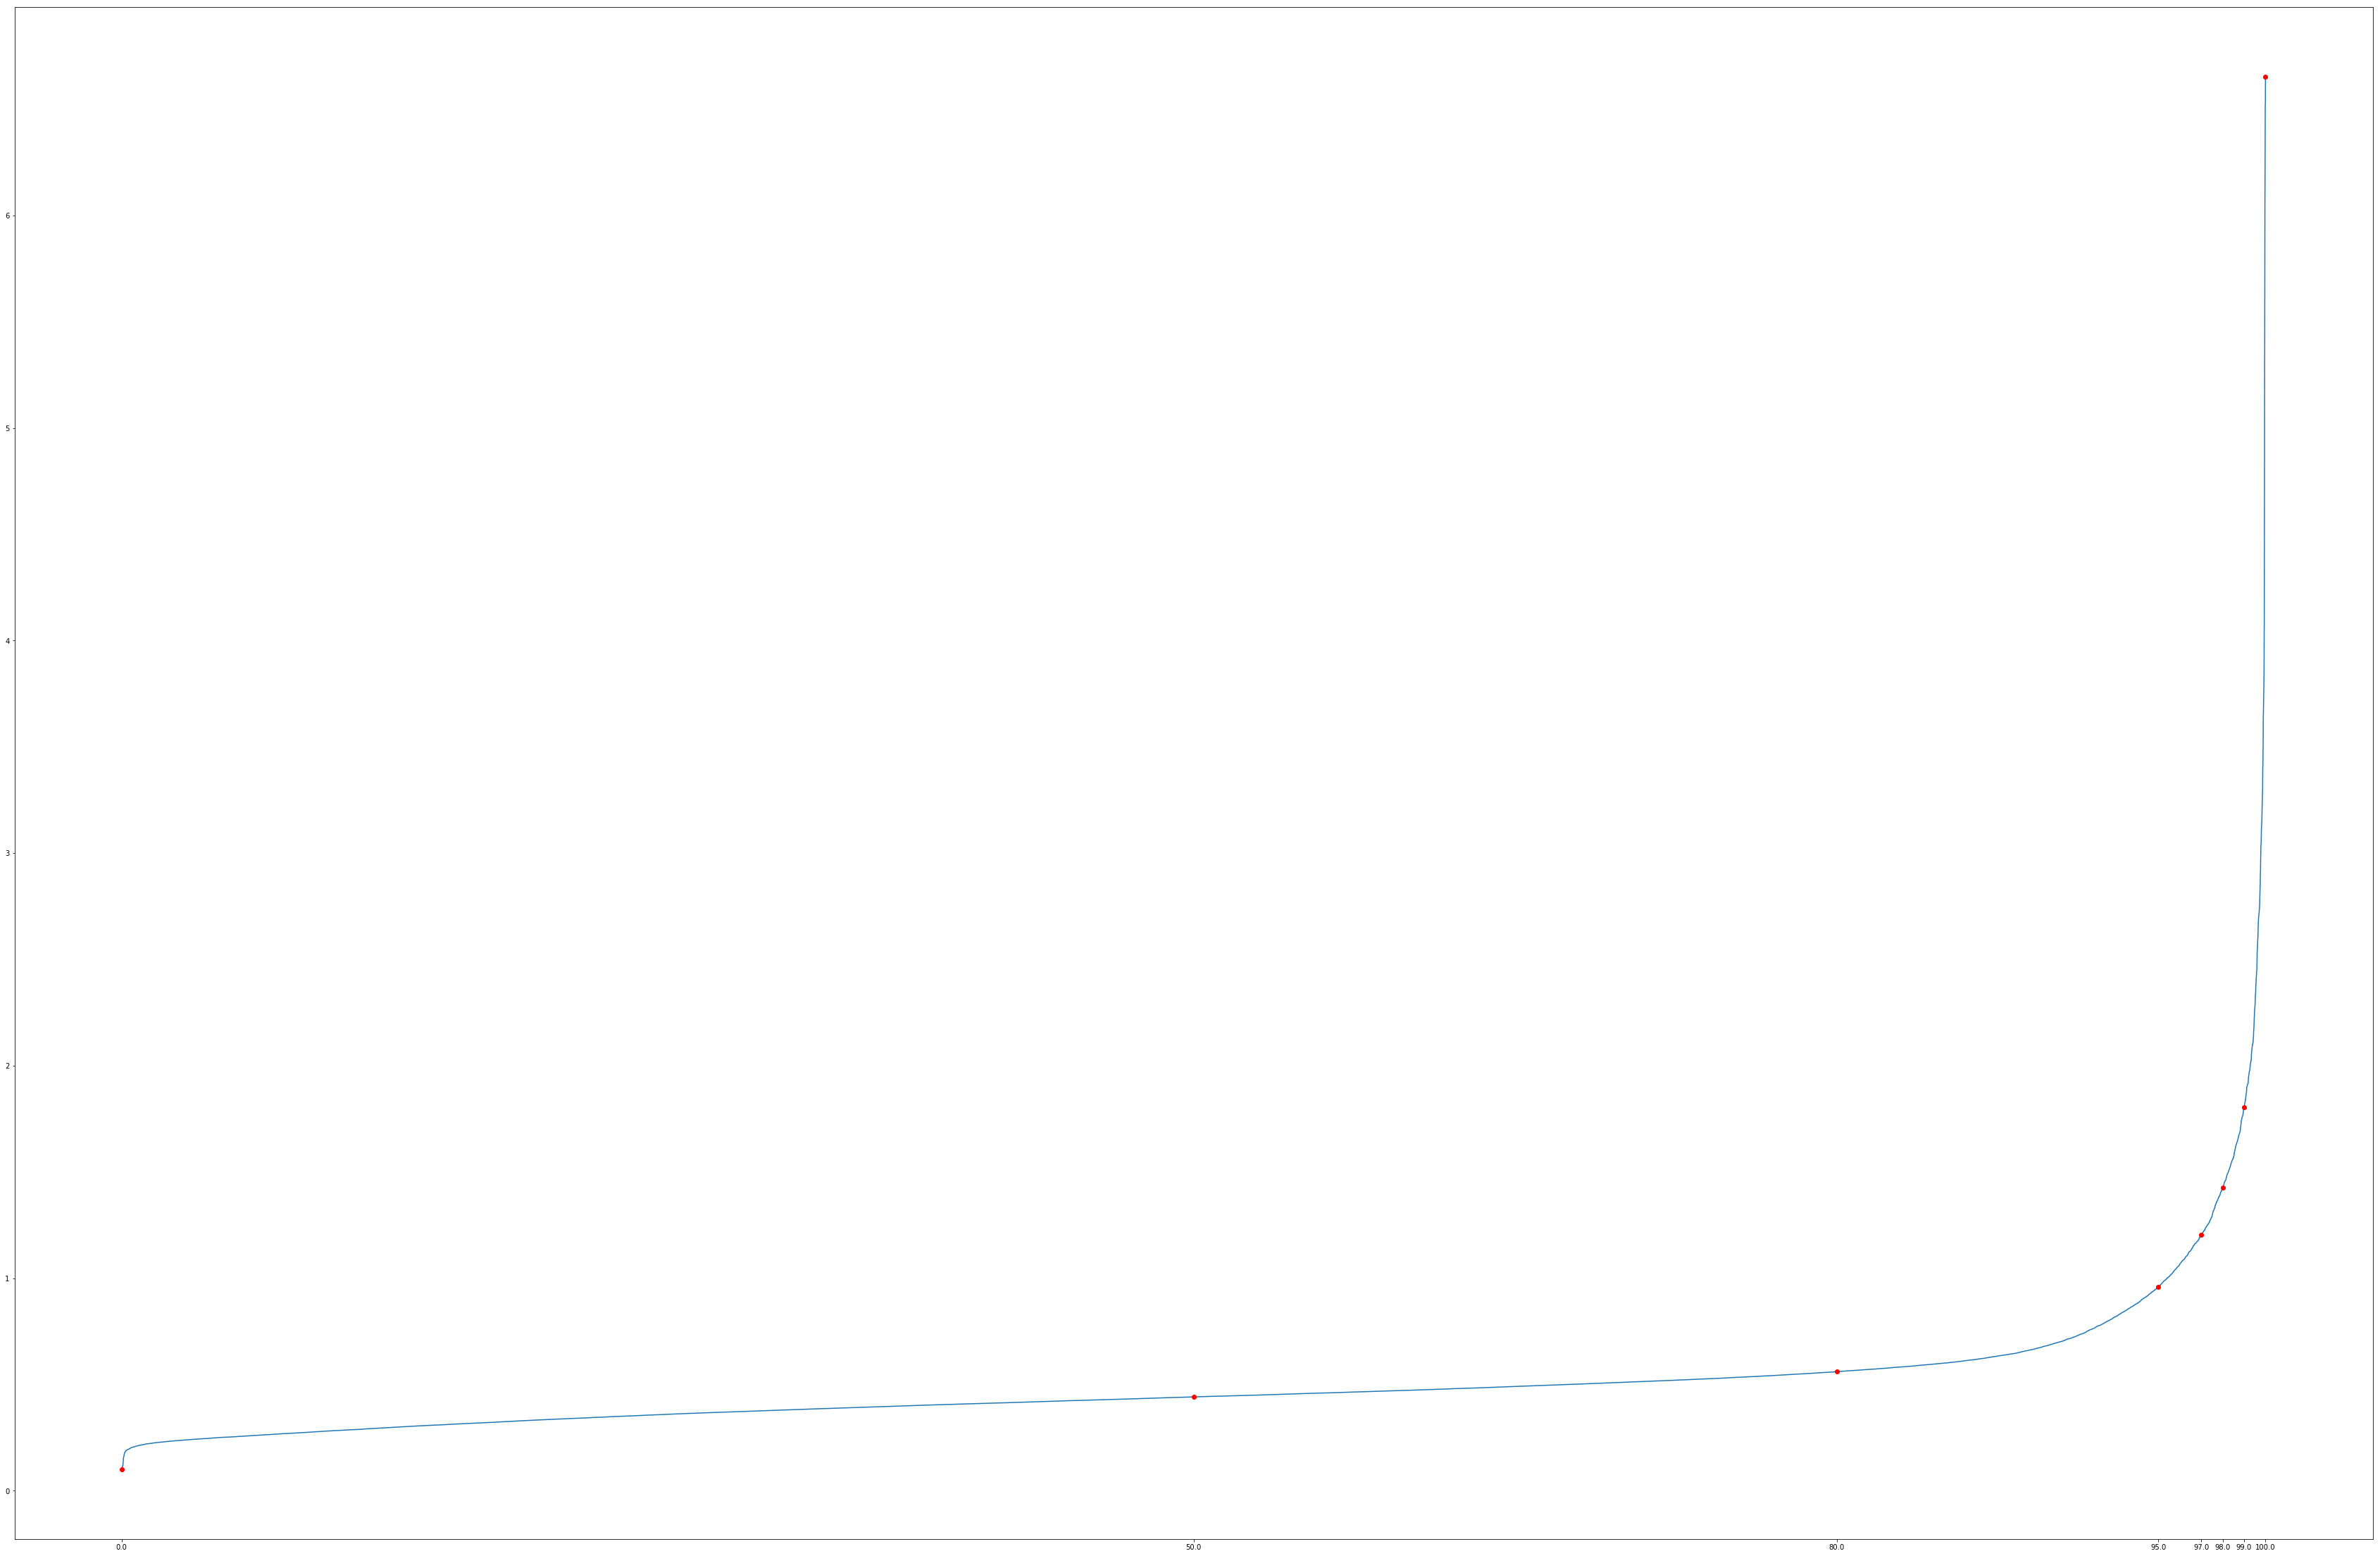

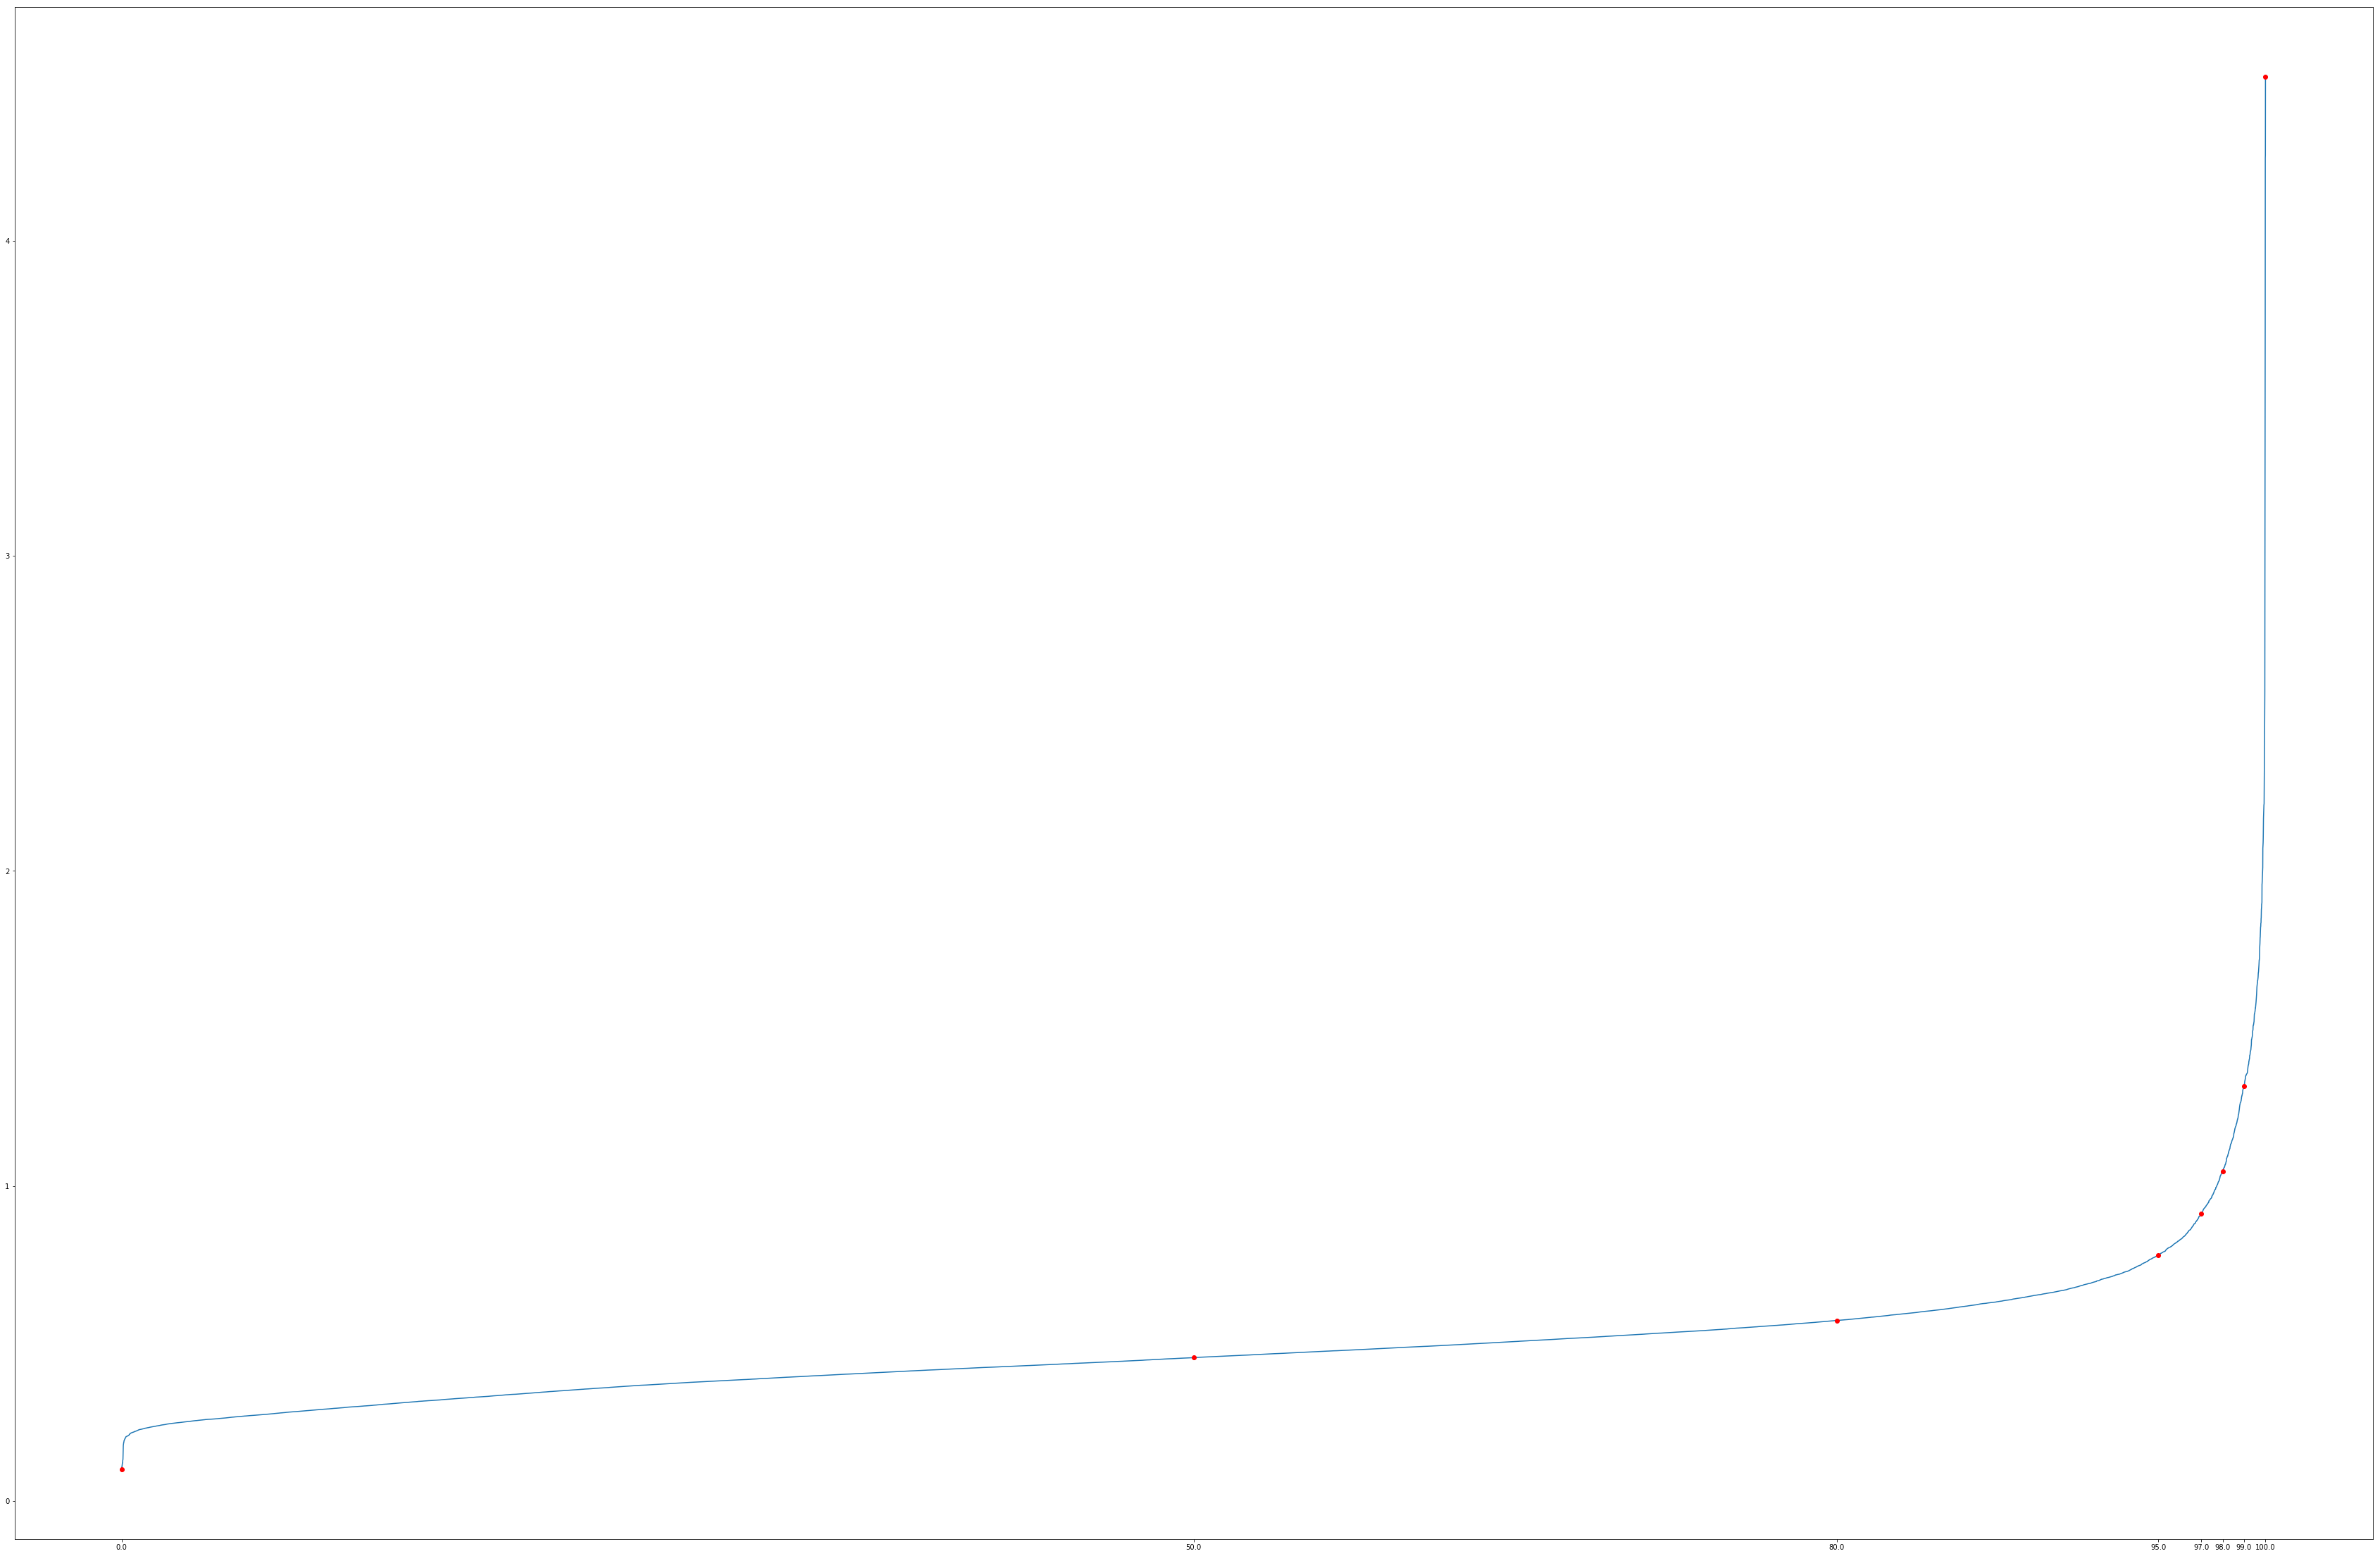

In [108]:
def draw(durations):
    d = np.array(durations)
    d.sort()


    # Percentile values
    p = np.array([0.0, 50.0, 80.0, 95, 97, 98, 99, 100.0])

    perc = mp.mlab.prctile(d, p=p)

    plt.plot(d)
    # Place red dots on the percentiles
    plt.plot((len(d)-1) * p/100., perc, 'ro')

    # Set tick locations and labels
    plt.xticks((len(d)-1) * p/100., map(str, p))

    plt.show()
    
draw(data["DurationSeconds"])
draw(data2["DurationSeconds"])

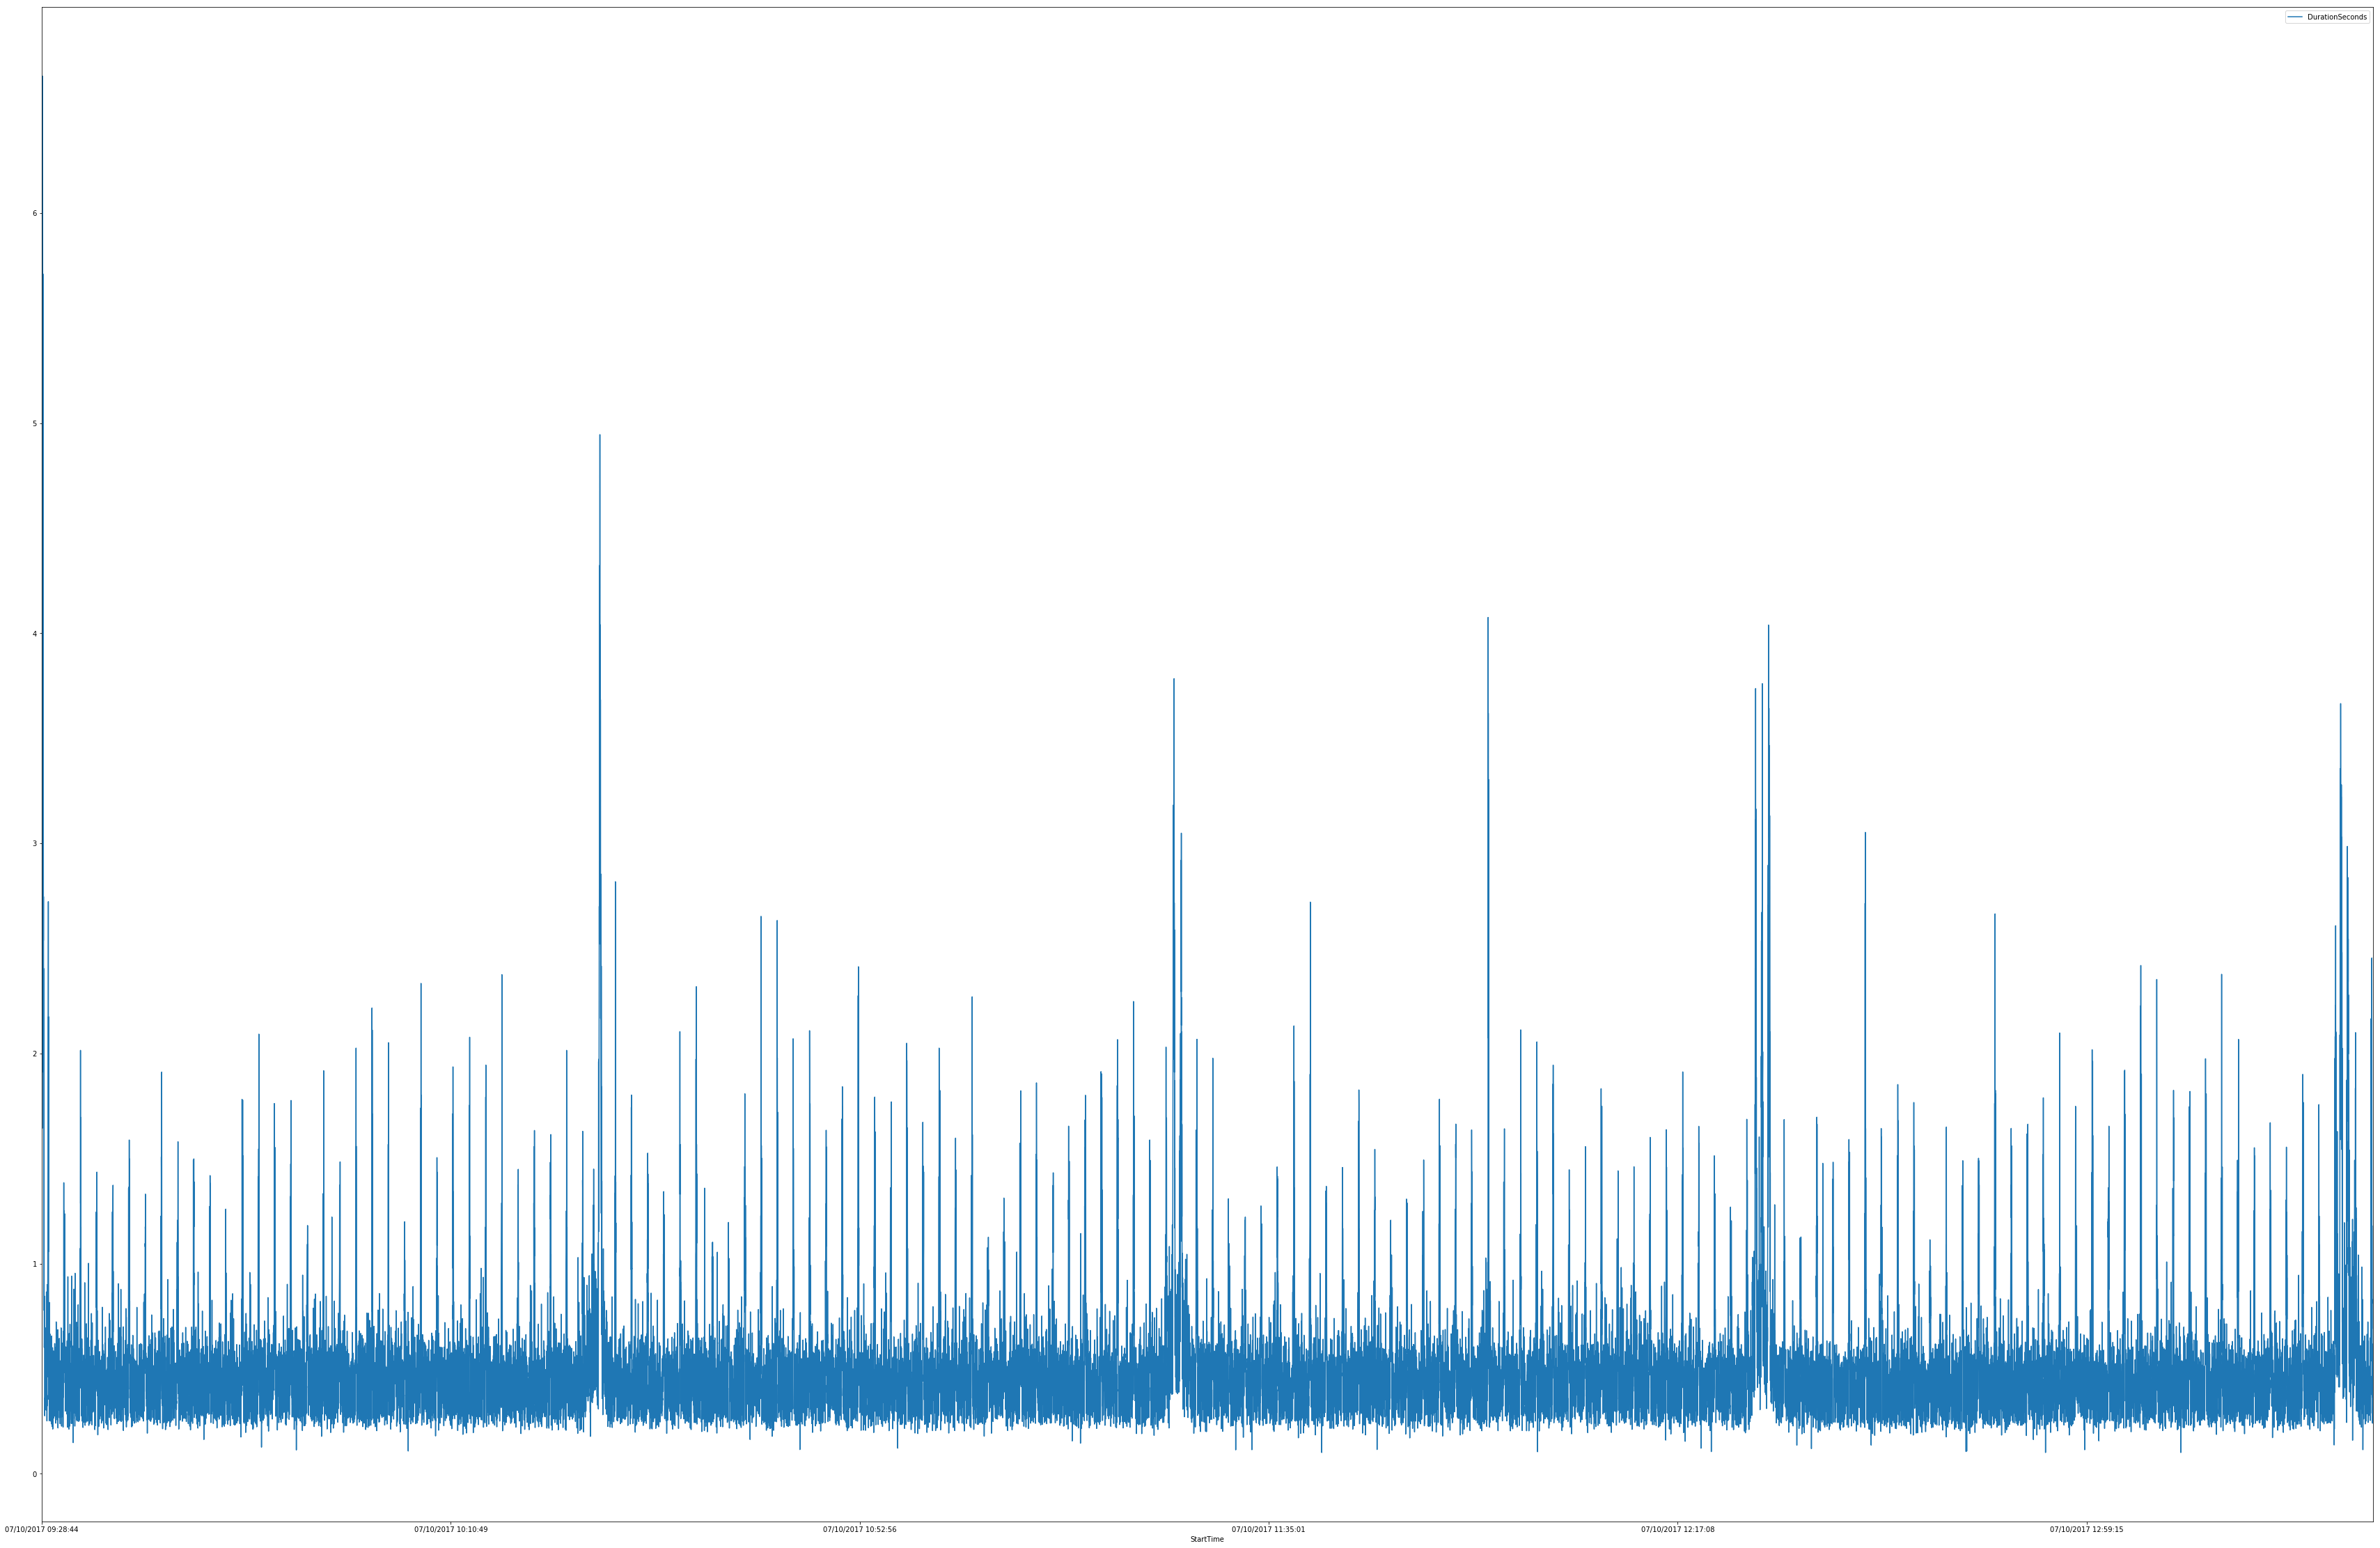

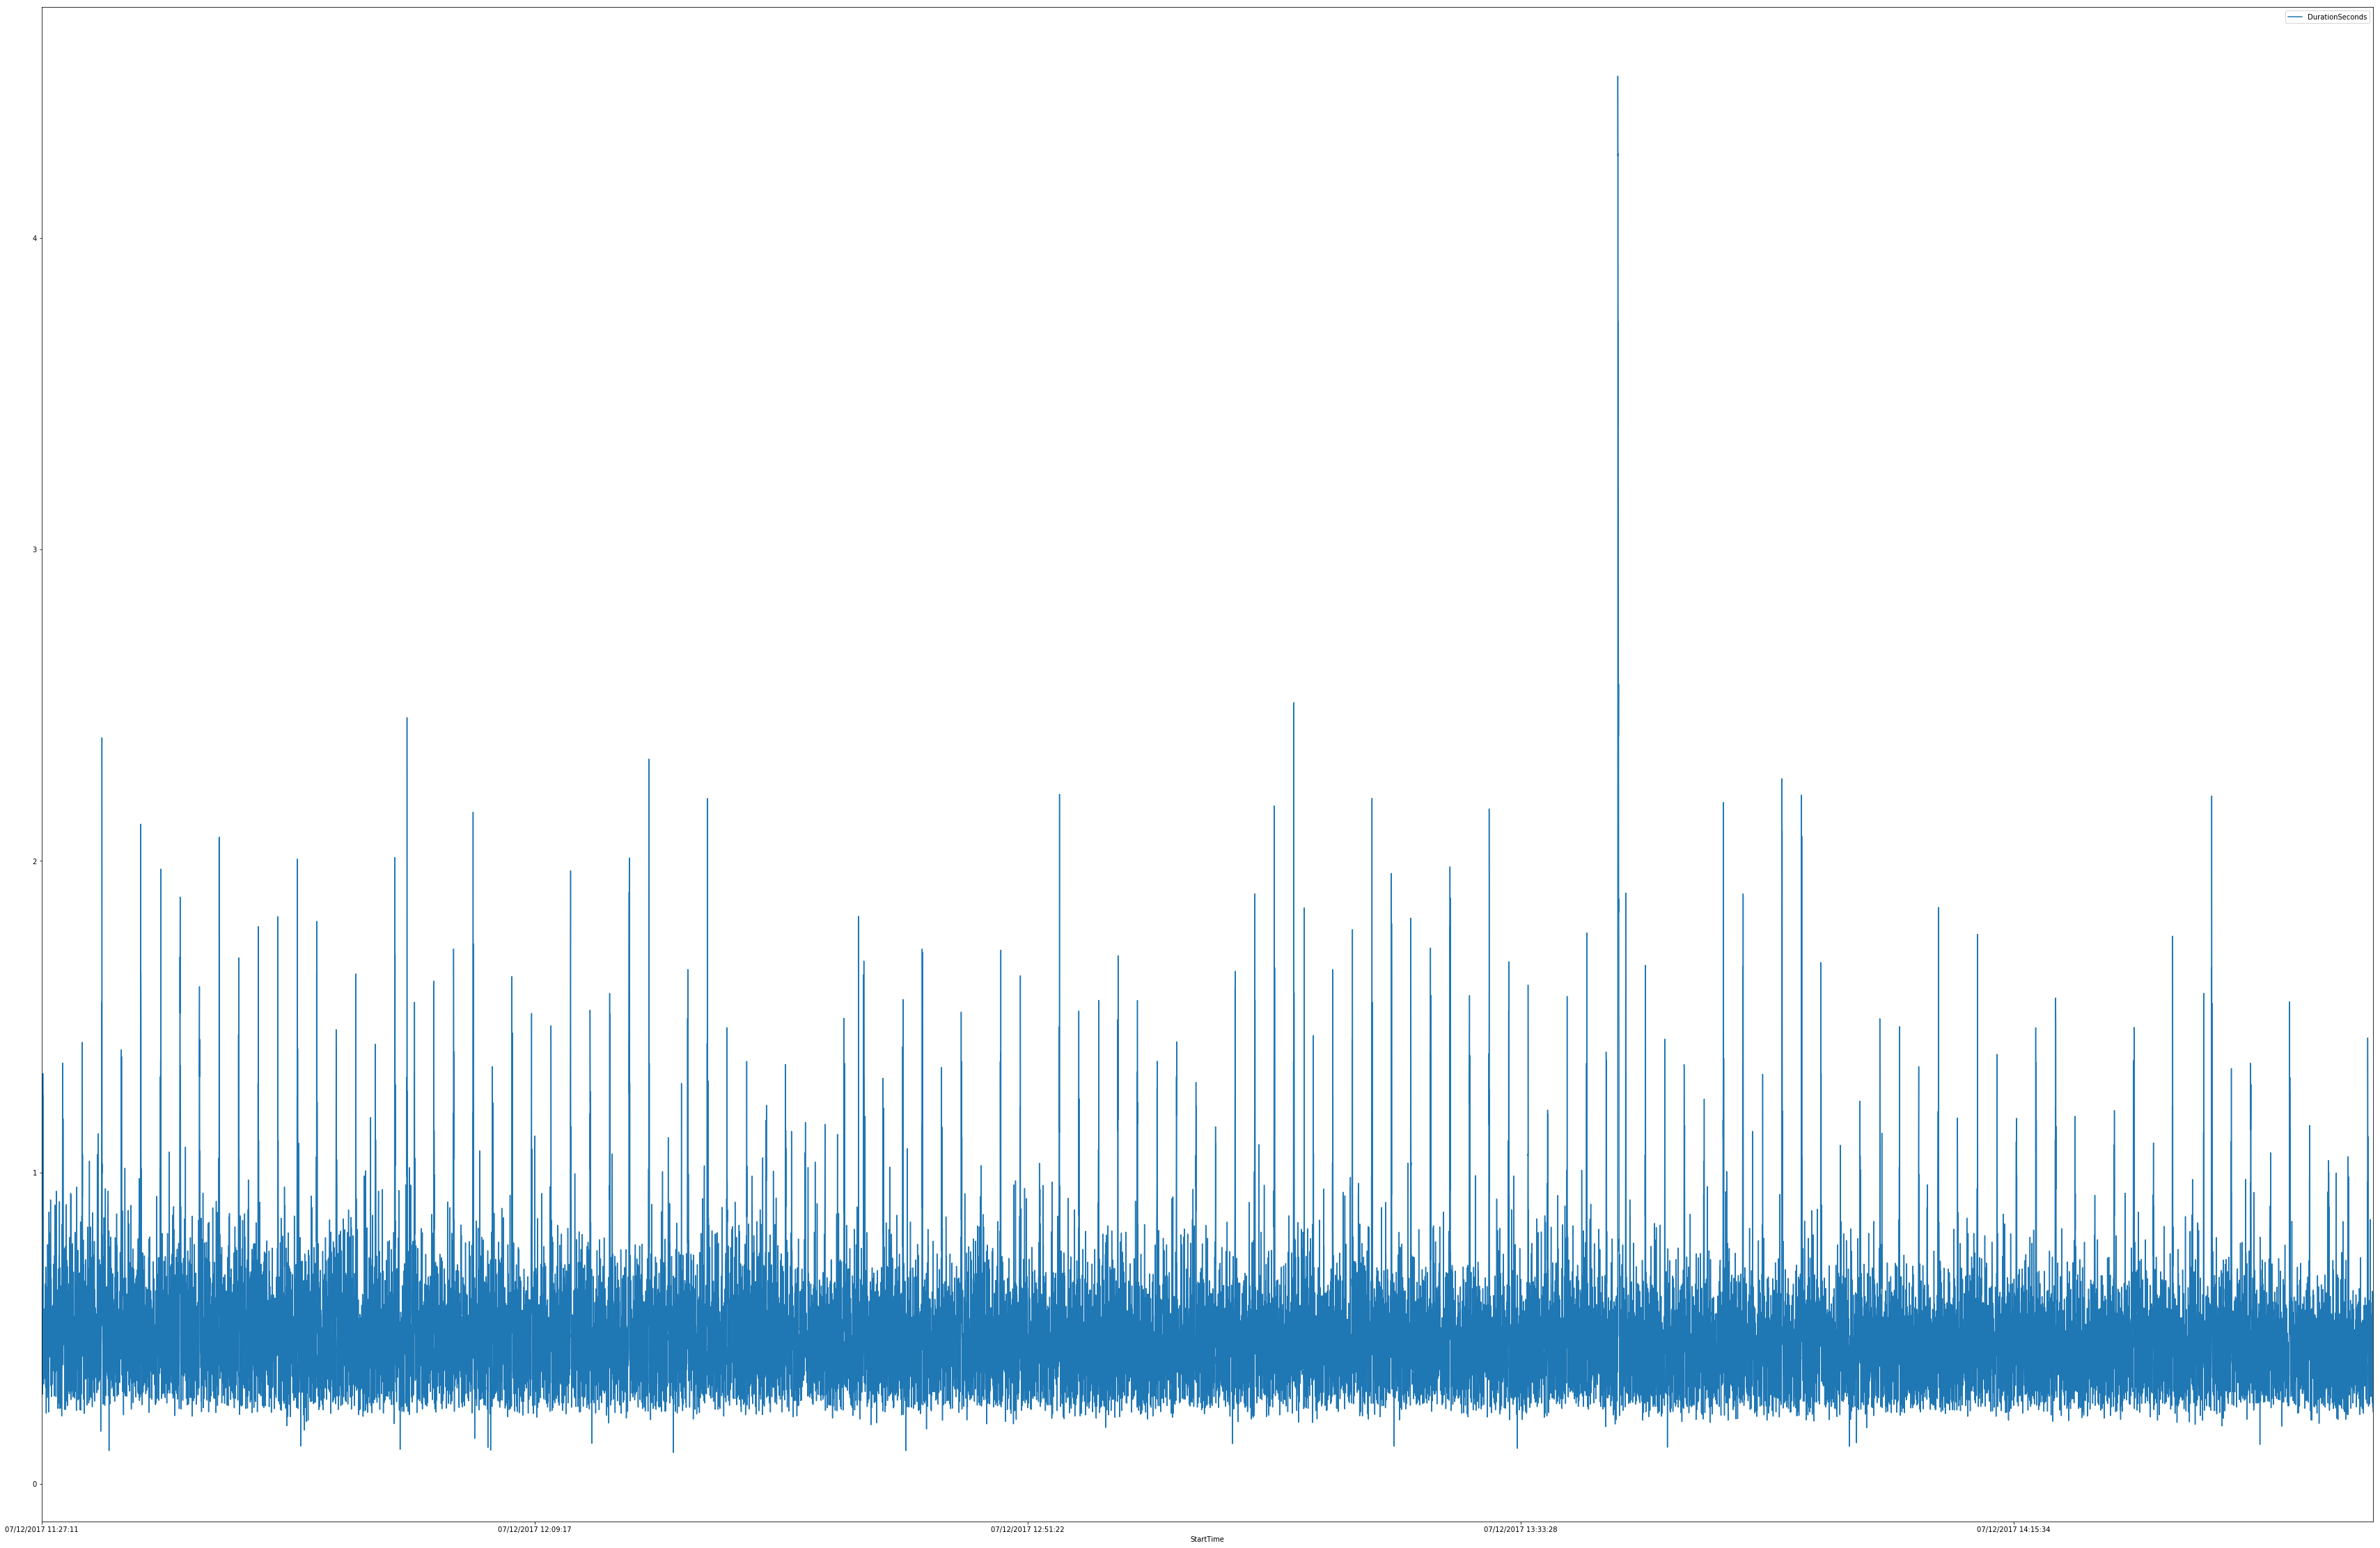

In [109]:
d = data2
d = d.filter(items=['StartTime', 'DurationSeconds'])
d.head()



def plotTimeGraph(d):
    d = d.filter(items=['StartTime', 'DurationSeconds'])
    d.set_index("StartTime", inplace= True)
    d.head()
    d.plot()
    plt.show()
    
plotTimeGraph(data)    
plotTimeGraph(data2)    